
# Regresión  - Ejercicio Advertising

El objetivo es usar regresión probablemente multivariada para entender como los gastos en anuncios impactan las ventas (variable a predecir es **sales**).

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [152]:
url = "https://raw.githubusercontent.com/eduardool/MaestriaCienciaDatos/main/datasets/advertising_regresion.csv"

In [153]:
datos = pd.read_csv(url)

In [154]:
datos.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Separar $X$ y $y$

In [155]:
datos.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [156]:
X = datos[['TV', 'radio', 'newspaper']]
y = datos['sales']

****Separar conjunto de entrenamiento (80\%) y prueba (20\%), random_state = 100****

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=100)

In [159]:
X_entrenamiento.shape

(160, 3)

In [160]:
X_prueba.shape

(40, 3)

## **Calcular y realizar la escala de variables sobre el conjunto entrenamiento.**


In [161]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [162]:
escalador = StandardScaler()

In [163]:
X_entrenamiento_escalado = escalador.fit_transform(X_entrenamiento)
X_prueba_escalado = escalador.fit_transform(X_prueba)

## REGRESION LINEAL MULTIVARIADA

In [164]:
from sklearn.linear_model import LinearRegression

In [165]:
lm = LinearRegression()

In [166]:
lm.fit(X_entrenamiento_escalado,y_entrenamiento) # aprendizaje ML

LinearRegression()

In [167]:
print(lm.intercept_)

13.798750000000002


In [168]:
params_df = pd.DataFrame(lm.coef_,X.columns,columns=['Parámetros'])
params_df

,Parámetros
TV,4.140009
radio,2.753257
newspaper,0.049765


In [169]:
predicciones = lm.predict(X_prueba)

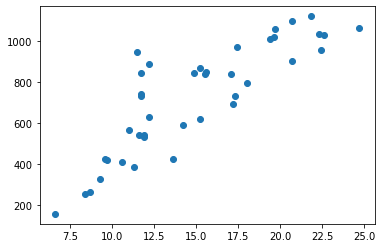

In [170]:
plt.scatter(y_prueba,predicciones)

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


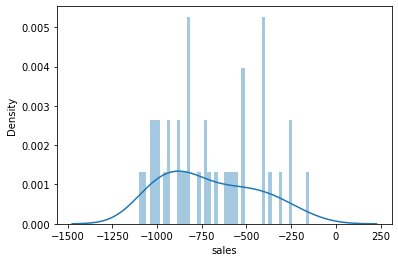

In [171]:
sns.distplot((y_prueba-predicciones),bins=50);

## RANDOM FOREST

In [172]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor(n_estimators=100, random_state=100)
reg_rf.fit(X_entrenamiento_escalado, y_entrenamiento)

RandomForestRegressor(random_state=100)

In [173]:
predicciones_rf = reg_rf.predict(X_prueba_escalado)

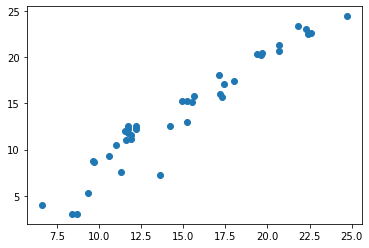

In [174]:
plt.scatter(y_prueba,predicciones_rf)

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


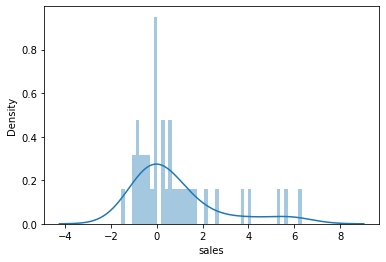

In [175]:
sns.distplot((y_prueba-predicciones_rf),bins=50);

## **Validación cruzada REGRESION LINEAL MULTIVARIADA**

In [176]:
from sklearn.model_selection import cross_val_score
linear_reg_scores = cross_val_score(lm, X_entrenamiento_escalado, y_entrenamiento,
                         scoring="neg_mean_squared_error", cv=5)
linear_reg_rmse_scores = np.sqrt(-linear_reg_scores)

In [177]:
def display_scores(linear_reg_scores):
    print("Scores:", linear_reg_scores)
    print("Mean:", linear_reg_scores.mean())
    print("Standard deviation:", linear_reg_scores.std())

display_scores(linear_reg_rmse_scores)

Scores: [1.39824197 1.80189657 2.05510236 1.70522543 2.21153457]
Mean: 1.834400181974481
Standard deviation: 0.2824593364447591


## **Validación cruzada RANDOM FOREST**

In [178]:
rf_scores = cross_val_score(reg_rf, X_entrenamiento_escalado, y_entrenamiento,
                         scoring="neg_mean_squared_error", cv=5)
rf_scores_rmse_scores = np.sqrt(-rf_scores)

In [179]:
def display_scores(rf_scores):
    print("Scores:", rf_scores)
    print("Mean:", rf_scores.mean())
    print("Standard deviation:", rf_scores.std())

display_scores(rf_scores_rmse_scores)

Scores: [0.75657286 0.76820174 0.87301469 0.84274114 1.29417124]
Mean: 0.9069403335795642
Standard deviation: 0.1985341439818027


## *El mejor modelo es el Random Forest*

## **Afinamiento del algoritmo Random Forest xon GridSearchCV.**


In [180]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [10, 50, 100], 'max_features': [1, 3]}
grid = GridSearchCV(reg_rf,param_grid,refit=True,verbose=2)  #afinamiento de Random Forest!
grid.fit(X_entrenamiento_escalado,y_entrenamiento)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....................max_features=1, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=1, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=1, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=1, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=1, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=1, n_estimators=50; total time=   0.0s


[CV] END ....................max_features=1, n_estimators=50; total time=   0.0s
[CV] END ....................max_features=1, n_estimators=50; total time=   0.0s
[CV] END ....................max_features=1, n_estimators=50; total time=   0.0s
[CV] END ....................max_features=1, n_estimators=50; total time=   0.0s
[CV] END ...................max_features=1, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=1, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=1, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=1, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=1, n_estimators=100; total time=   0.0s
[CV] END ....................max_features=3, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=3, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=3, n_estimators=10; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=RandomForestRegressor(random_state=100),
             param_grid={'max_features': [1, 3], 'n_estimators': [10, 50, 100]},
             verbose=2)

## **RMSE del algoritmo afinado**

In [181]:
from sklearn.metrics import mean_squared_error

modelo_final = grid.best_estimator_

predicciones_finales = modelo_final.predict(X_prueba_escalado)

final_mse = mean_squared_error(y_prueba, predicciones_finales)
final_rmse = np.sqrt(final_mse)


In [182]:
final_rmse

2.0176048237947883